### 学习是指从训练数据中自动获取最优权重参数的过程。
学习的目的就是以**损失函数**为基准，找到能是他达到最小的权重参数
* 为了找出尽可能小的损失函数值，本章将利用函数斜率的梯度法。

* 神经网络的特征就是从数据中学习
* 数据自动决定参数权重的值
* 在计算机视觉领域，常用的特征量包括 SIRF，SURF，HOG等。
* 使用这些特征量将图像数据转化为向量，然后对转化后对向量使用机器学习中的 SVM，KNN 等分类器进行学习。
* 机器学习和深度学习的区别在于机器学习还是需要人工选择合适的特征量，而深度学习则完全无人工介入。

### 机器学习中，一般将数据分为训练数据和测试数据。
* 泛化能力是指处理未被观察过的数据等能力。
* 获得泛化能力是机器学习等最终目标。
* 支队某个数据集过度拟合等状态称为 over fitting。避免过度拟合也是一个重要课题。

### 损失函数
* 神经网络的学习通过某个指标表示现在的状态。然后以这个指标为基准，寻找最优权重参数。
* 神经网络的学习中所用的指标被称为损失函数 loss function
* 损失函数一般用**均方误差**和**交叉熵误差**
* 损失函数表示神经网络性能恶劣程度，即当前神经网络对监督数据在多大程度上不拟合。

### 均方误差 mean squared error
* 均方误差是最常用的损失函数之一
* 均方误差是指预测值与真实值之差的平方的平均值
* 均方误差的计算公式如下：
  E = 1/2 Σ (y_k - t_k)^2
  其中，y_k 是神经网络的输出值，t_k 是监督数据的正确答案
* 均方误差的值越小，表示神经网络的预测值与真实值越接近，性能越好

In [20]:
# 均方误差的计算
import numpy as np
def mse(y, t):
    return 0.5 * np.sum((y - t) ** 2)

# 比如识别数字图片，假设神经网络的输出值 y 和正确答案 t 如下：
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 神经网络的输出值
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 正确答案（监督数据）
print(mse(y, t)) # 计算均方误差

0.09750000000000003


In [21]:
# 上述情况是神经网络预测正确时的均方误差
# 如果神经网络预测错误，比如输出值 y 如下：
z = np.array([0.1, 0.3, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 神经网络的输出值
print(mse(z, t)) # 计算均方误差

0.46625


### 交叉熵误差 cross entropy error
* 交叉熵误差是分类问题中常用的损失函数
* 交叉熵误差的计算公式如下：
  E = - Σ t_k log(y_k)
  其中，y_k 是神经网络的输出值，t_k 是监督数据的正确答案
* 交叉熵误差的值越小，表示神经网络的预测值与真实值越接近，性能越好

In [22]:
# 交叉熵误差的计算
def cee(y, t):
    delta = 1e-7 # 防止 log(0) 的情况
    return -np.sum(t * np.log(y + delta))
print('f"correct prediction:{}"', cee(y, t)) # 计算交叉熵误差
print('f"wrong prediction:{}"', cee(z, t)) # 计算交叉熵误差

f"correct prediction:{}" 0.510825457099338
f"wrong prediction:{}" 2.302584092994546


### mini-batch 学习
* 机器学习严格来说，就是针对训练数据计算损失函数，找到最小损失函数值对应的权重参数的过程。
* 但是，实际应用中，训练数据往往非常庞大，一次性使用全部训练数据计算损失函数，效率非常低下。
* 因此，实际应用中，通常使用 mini-batch 学习。
* mini-batch 学习是指从训练数据中随机抽取一小部分数据。
* 要求的是这部分数据的损失函数值的总和最小。

In [28]:
# MNIST 数据集的 mini-batch 学习示例
import import_ipynb
import mnist
from mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

# 从训练数据中随机抽取 10 个样本作为 mini-batch, 可以使用 np.random.choice 函数
train_size = x_train.shape[0] # 训练数据的数量
batch_size = 10 # mini-batch 的大小
batch_mask = np.random.choice(train_size, batch_size) # 随机抽取 batch，batch_mash 的数据类型是 ndarray，值是抽取的样本的索引
x_batch = x_train[batch_mask] # mini-batch 的输入数据
t_batch = t_train[batch_mask] # mini-batch 的正确答案

# mini-batch 版本的交叉熵误差计算
def cross_entropy_error(y, t):
    if y.ndim == 1: # 如果 y 是一维数组
        t = t.reshape(1, t.size) # 将 t 转换为二维数组
        y = y.reshape(1, y.size) # 将 y 转换为二维数组
    batch_size = y.shape[0] # mini-batch 的大小
    delta = 1e-7 # 防止 log(0) 的情况
    return -np.sum(t * np.log(y + delta)) / batch_size # 返回 mini-batch 的平均交叉熵误差

# mini-batch 版本的均方误差计算
def mean_squared_error(y, t):
    if y.ndim == 1: # 如果 y 是一维数组
        t = t.reshape(1, t.size) # 将 t 转换为二维数组
        y = y.reshape(1, y.size) # 将 y 转换为二维数组
    batch_size = y.shape[0] # mini-batch 的大小
    return 0.5 * np.sum((y - t) ** 2) / batch_size # 返回 mini-batch 的平均均方误差

print("correct cross entropy error:", cross_entropy_error(y, t)) # 计算交叉熵误差
print("wrong cross entropy error:", cross_entropy_error(z, t)) # 计算交叉熵误差
print("correct mean squared error:", mean_squared_error(y, t)) # 计算均方误差
print("wrong mean squared error:", mean_squared_error(z, t)) # 计算均方误差

(60000, 784)
(60000, 10)
correct cross entropy error: 0.510825457099338
wrong cross entropy error: 2.302584092994546
correct mean squared error: 0.09750000000000003
wrong mean squared error: 0.46625


```
为了找到损失函数的值尽可能小的参数，需要计算参数的导数（梯度），然后以这个梯度为基准，调整参数的值。
对一个权重参数的损失函数求导数，表示该权重参数变化时，损失函数变化的趋势。
如果导数的值为正，表示该权重参数增大时，损失函数也增大；
如果导数的值为负，表示该权重参数增大时，损失函数减小；
如果导数的值为零，表示该权重参数变化时，损失函数不变。此时，损失函数达到最小值。应该停止调整参数。
因此，可以通过计算导数的值，来调整权重参数的值，使损失函数的值尽可能小。
```

### 为什么要引入损失函数，而不用精度等指标来衡量神经网络的性能？
* 损失函数是一个连续的函数，可以通过导数来调整参数的值。
* 精度等指标是一个离散的函数，无法通过导数来调整参数的值。对精度等指标求导数，结果往往是零，无法指导参数的调整。
* 因此，损失函数更适合用来衡量神经网络的性能。

## 数值微分
### 导数
* 导数是函数在某一点处的变化率，表示函数值随自变量变化的快慢程度。
* 导数的计算公式如下：
  f'(x) = lim(h->0) (f(x+h) - f(x)) / h
* 导数的几何意义是函数图像在某一点处的切线的斜率。
* 即 x 的微小变化量 h 趋近于 0 时，函数值 f(x) 的变化量与 h 的比值。

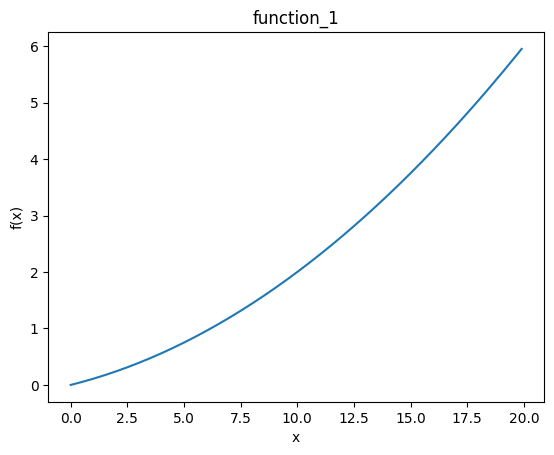

0.1999999999990898
0.2999999999986347


In [30]:
# 代码实现导数的计算
def numerical_diff(f, x):
    h = 1e-4 # 微小的变化量
    return (f(x + h) - f(x - h)) / (2 * h) # 中心差分法
# 尝试对一个简单的函数求导数，并画图
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1) # 0.0 到 20.0，步长为 0.1
y = function_1(x) # 计算函数值
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("function_1")
plt.plot(x, y) # 画图
plt.show() # 显示图像

# 计算 x = 5 处的导数
print(numerical_diff(function_1, 5)) # 0.2
# 计算 x = 10 处的导数
print(numerical_diff(function_1, 10)) # 0.3


### 偏导数
* 偏导数是多元函数对某一个变量的导数，表示该变量变化时，函数值的变化率。
* 求偏导数时，需要将一个变量看作自变量，其他变量看作常量（固定值）。

In [35]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
# 此函数中，x 是一个二维向量，x[0] 和 x[1] 分别表示 x 的第一个和第二个分量。任意一个变量变化时，函数值的变化率。

## 梯度
* 梯度是多元函数的偏导数构成的向量，表示函数在各个变量方向上的变化率。
* 即由全部变量的偏导数组成的向量。

[6. 8.]
[0. 4.]
[6. 0.]
x0: [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25]


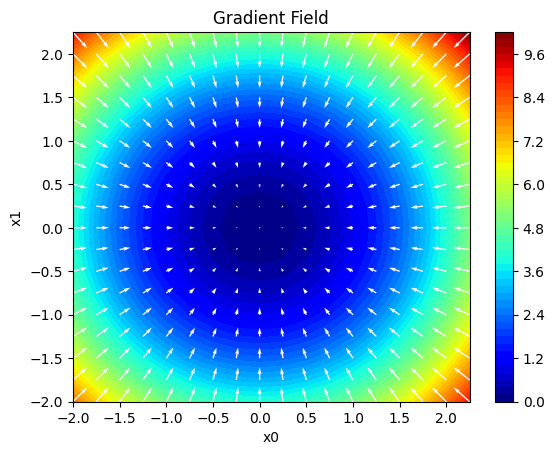

In [39]:
# 梯度函数，f 是目标函数，x 是目标函数的自变量（向量），格式为 ndarray
def numerical_gradient(f, x):
    h = 1e-4 # 微小的变化量
    grad = np.zeros_like(x) # 初始化梯度向量，和 x 形状相同，值全为 0
    for idx in range(x.size): # 遍历 x 的每个分量
        tmp_val = x[idx] # 保存当前分量的值
        # 计算 f(x + h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # 计算 f(x - h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h) # 计算偏导数
        x[idx] = tmp_val # 恢复当前分量的值
    return grad
# 计算 function_2 在 (3, 4)， (0, 2) 和 (3, 0) 处的梯度
print(numerical_gradient(function_2, np.array([3.0, 4.0]))) # [6.0, 8.0]
print(numerical_gradient(function_2, np.array([0.0, 2.0]))) # [0.0, 4.0]
print(numerical_gradient(function_2, np.array([3.0, 0.0]))) # [6.0, 0.0]

# 画出梯度图
import matplotlib.pylab as plt
x0 = np.arange(-2, 2.5, 0.25) # -2 到 2，步长为 0.25
print("x0:", x0)
x1 = np.arange(-2, 2.5, 0.25) # -2 到 2，步长为 0.25
X0, X1 = np.meshgrid(x0, x1) # 生成网格点坐标矩阵
Y = function_2(np.array([X0, X1])) # 计算函数值
# 调用 numerical_gradient 函数计算梯度
grad = np.zeros((2, X0.shape[0], X0.shape[1])) # 初始化梯度矩阵
for i in range(X0.shape[0]):
    for j in range(X0.shape[1]):
        point = np.array([X0[i, j], X1[i, j]])
        grad[:, i, j] = numerical_gradient(function_2, point)
# 画出等高线图
plt.contourf(X0, X1, Y, levels=50, cmap='jet')
plt.colorbar()
# 画出梯度向量场
plt.quiver(X0, X1, -grad[0], -grad[1], color='white')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Gradient Field')
plt.show()


### 梯度指向的方向时个点出函数值减小最快的方向。
* 因此，可以通过沿着梯度的反方向移动，来找到函数的最小值。
* 这种方法被称为梯度法
## 梯度法
* 最优参数是指使损失函数值最小的参数。
* 一般来说，损失函数是一个复杂的非线性函数，无法通过解析方法求解最优参数。
* 通过使用梯度来寻找最优参数的方法被称为梯度法。
```
需要注意的是，梯度只表示各点处函数值减小最快的方向，并不表示能达到全局最小值。
因此梯度无法保证指向方向是全局最优解或者真正应该前进的方向。
在复杂问题中，梯度指示的方向往往不是函数值的最小处。
```
**函数的极小值，最小值被称为鞍点（saddle point）**
* 鞍点的梯度为零。
* 极小值和最小值的区别在于，极小值是局部最小值，而最小值是全局最小值。
* 梯度法是要寻找梯度为 0 的点，但并不保证该点是全局最小值。
* 因此当函数很复杂并呈扁平状时，学习可能会进入一个几乎平坦的区域，导致学习停滞不前，这种区域被称为学习高原（learning plateau）。